<a href="https://colab.research.google.com/github/R-Ranito/FYP/blob/main/FYP_RuiRanito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Covid19-dataset.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Mounted at /content/gdrive/


In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!unzip "/content/gdrive/My Drive/Covid19-dataset.zip"

Archive:  /content/gdrive/My Drive/Covid19-dataset.zip
   creating: Covid19-dataset/test/
   creating: Covid19-dataset/test/Covid/
  inflating: Covid19-dataset/test/Covid/COVID-201.png  
  inflating: Covid19-dataset/test/Covid/COVID-202.png  
  inflating: Covid19-dataset/test/Covid/COVID-203.png  
  inflating: Covid19-dataset/test/Covid/COVID-204.png  
  inflating: Covid19-dataset/test/Covid/COVID-205.png  
  inflating: Covid19-dataset/test/Covid/COVID-206.png  
  inflating: Covid19-dataset/test/Covid/COVID-207.png  
  inflating: Covid19-dataset/test/Covid/COVID-208.png  
  inflating: Covid19-dataset/test/Covid/COVID-209.png  
  inflating: Covid19-dataset/test/Covid/COVID-210.png  
  inflating: Covid19-dataset/test/Covid/COVID-211.png  
  inflating: Covid19-dataset/test/Covid/COVID-212.png  
  inflating: Covid19-dataset/test/Covid/COVID-213.png  
  inflating: Covid19-dataset/test/Covid/COVID-214.png  
  inflating: Covid19-dataset/test/Covid/COVID-215.png  
  inflating: Covid19-dataset/

In [121]:
import tensorflow as tf
import itertools
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks
from tensorflow import argmax
from tensorflow import expand_dims
from matplotlib import pyplot as plt
from keras import utils
import matplotlib.pyplot as plt
import os 
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [122]:
#Data Augmentation technique to improve the dataset.
gen = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
    rescale=1/255)

#loaded the train and test data by resizing it, changing its color scale and varying the batch
#and the type of dataset is specified

train_iter = gen.flow_from_directory('Covid19-dataset/train',target_size = (200, 200), 
                                       batch_size = 16,color_mode = 'rgb', class_mode='categorical')

test_iter = gen.flow_from_directory('Covid19-dataset/test',target_size = (200, 200), 
                                       batch_size = 16,color_mode = 'rgb', class_mode='categorical')

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


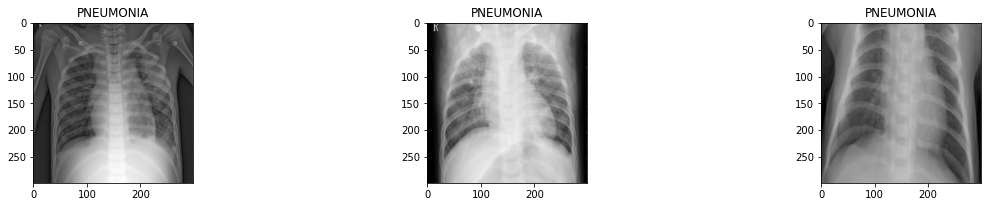

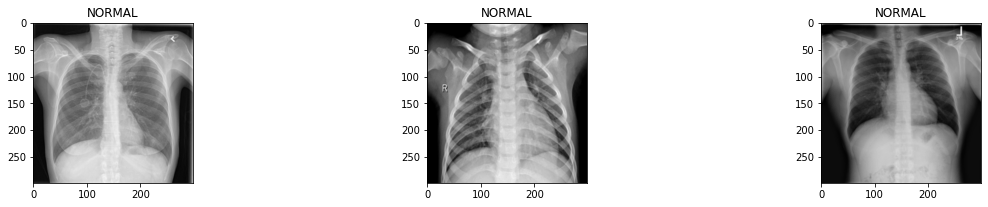

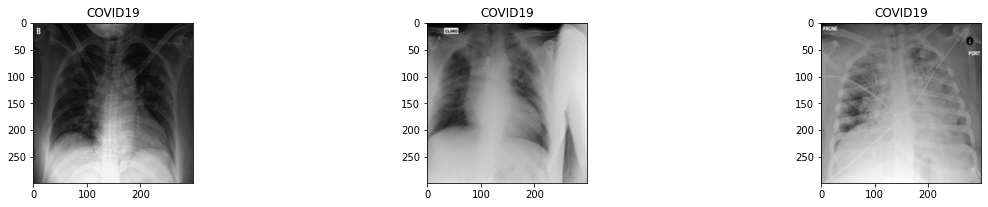

In [123]:
#Different types of images are displayed
train_image='Covid19-dataset/train'
pneumonia_images = os.listdir(train_image + "/Pneumonia")
normal_images = os.listdir(train_image + "/Normal")
covid_images = os.listdir(train_image + "/Covid")
#sPNEUMONIA tag images are displayed
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(train_image + "/Pneumonia",pneumonia_images[i])),cmap='gray')
    plt.title("PNEUMONIA")
    
plt.show()
#NORMAL label images are displayed
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(train_image + "/Normal",normal_images[i])),cmap='gray')
    plt.title("NORMAL")

plt.show()
#COVID tag images are displayed
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(train_image + "/Covid",covid_images[i])),cmap='gray')
    plt.title("COVID19")

In [124]:
#generate the neural network, making use of transfern learning, with the VGG16
VGG16_model = VGG16(input_shape = train_iter.image_shape,
                    include_top = False, weights = 'imagenet')
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [125]:
#Code to freeze the convolutional base layers in order to prevent their weights from being updated.
#during the training
for i in VGG16_model.layers[0:-10]:
    layers.trainable = False

In [126]:
#Code to generate the neural network, making use of transfern learning, with the Xception
xception_model = Xception(input_shape = train_iter.image_shape,
                    include_top = False, weights = 'imagenet')
xception_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 99, 99, 32)   864         ['input_22[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 99, 99, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

In [127]:
#Code to freeze the convolutional base layers in order to prevent their weights from being updated.
#during the training
for i in xception_model.layers:
    layers.trainable = False

#creating the model with VGG16
tfVGG16_model = keras.Sequential([
    VGG16_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.15),
 
])
tfVGG16_model.summary()

In [128]:
#creating the model with VGG16
tfVGG16_model = keras.Sequential([
    VGG16_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(3, activation='sigmoid'),
])
tfVGG16_model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_24 (Flatten)        (None, 18432)             0         
                                                                 
 dense_47 (Dense)            (None, 256)               4718848   
                                                                 
 dropout_32 (Dropout)        (None, 256)               0         
                                                                 
 dense_48 (Dense)            (None, 3)                 771       
                                                                 
Total params: 19,434,307
Trainable params: 19,434,307
Non-trainable params: 0
_________________________________________________________________


In [129]:
#creating the model with xception
tfXception_model = keras.Sequential([
    xception_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(3, activation='softmax'),
])
tfXception_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_25 (Flatten)        (None, 100352)            0         
                                                                 
 dense_49 (Dense)            (None, 256)               25690368  
                                                                 
 dropout_33 (Dropout)        (None, 256)               0         
                                                                 
 dense_50 (Dense)            (None, 3)                 771       
                                                                 
Total params: 46,552,619
Trainable params: 46,498,091
Non-trainable params: 54,528
_________________________________________________________________


In [130]:
#Now I create my own model
final_model = keras.Sequential([
    layers.Input(shape = train_iter.image_shape),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(3, activation='softmax'),

])
final_model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_28 (Bat  (None, 200, 200, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                     

In [131]:
#Code to compile the neural networks created 
tfXception_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
final_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
tfVGG16_model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])



In [132]:
#The early stopping is created
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=5, 
    restore_best_weights=True,
)

In [150]:
# Training the neural networks
history_final = final_model.fit(train_iter, epochs = 10,batch_size = 16,callbacks=[early_stopping],
                         validation_data=test_iter)

Epoch 1/10
38/38 [==============================] - 11s 258ms/step - loss: 1.5115 - accuracy: 0.4350 - val_loss: 1.1312 - val_accuracy: 0.3333
Epoch 2/10
38/38 [==============================] - 10s 252ms/step - loss: 0.8496 - accuracy: 0.6083 - val_loss: 0.9889 - val_accuracy: 0.5267
Epoch 3/10
38/38 [==============================] - 10s 254ms/step - loss: 0.8262 - accuracy: 0.5867 - val_loss: 1.0598 - val_accuracy: 0.3733
Epoch 4/10
38/38 [==============================] - 10s 254ms/step - loss: 0.7600 - accuracy: 0.6483 - val_loss: 0.8195 - val_accuracy: 0.5933
Epoch 5/10
38/38 [==============================] - 10s 254ms/step - loss: 0.6956 - accuracy: 0.6733 - val_loss: 0.6943 - val_accuracy: 0.7267
Epoch 6/10
38/38 [==============================] - 10s 259ms/step - loss: 0.7048 - accuracy: 0.7000 - val_loss: 0.6068 - val_accuracy: 0.7867
Epoch 7/10
38/38 [==============================] - 10s 254ms/step - loss: 0.6918 - accuracy: 0.6983 - val_loss: 0.6649 - val_accuracy: 0.7133

In [133]:
history_VGG16 = tfVGG16_model.fit(train_iter, epochs = 5,batch_size = 5,callbacks=[early_stopping],
                         validation_data=test_iter)

Epoch 1/5
38/38 [==============================] - 18s 443ms/step - loss: 2.8917 - accuracy: 0.3683 - val_loss: 1.1312 - val_accuracy: 0.3333
Epoch 2/5
38/38 [==============================] - 16s 428ms/step - loss: 1.1076 - accuracy: 0.3217 - val_loss: 1.0964 - val_accuracy: 0.3533
Epoch 3/5
38/38 [==============================] - 17s 449ms/step - loss: 1.0999 - accuracy: 0.3417 - val_loss: 1.0862 - val_accuracy: 0.4600
Epoch 4/5
38/38 [==============================] - 17s 432ms/step - loss: 1.0461 - accuracy: 0.4467 - val_loss: 1.0667 - val_accuracy: 0.4867
Epoch 5/5
38/38 [==============================] - 17s 433ms/step - loss: 1.0261 - accuracy: 0.4317 - val_loss: 0.9327 - val_accuracy: 0.5267


In [134]:
history_Xception = tfXception_model.fit(train_iter, epochs = 10,batch_size = 16,callbacks=[early_stopping],
                         validation_data=test_iter)

Epoch 1/10
38/38 [==============================] - 88s 669ms/step - loss: 1.8700 - accuracy: 0.4150 - val_loss: 1.0978 - val_accuracy: 0.5533
Epoch 2/10
38/38 [==============================] - 24s 629ms/step - loss: 0.9036 - accuracy: 0.5483 - val_loss: 2.0215 - val_accuracy: 0.6533
Epoch 3/10
38/38 [==============================] - 24s 636ms/step - loss: 0.8777 - accuracy: 0.6333 - val_loss: 0.8035 - val_accuracy: 0.7733
Epoch 4/10
38/38 [==============================] - 24s 635ms/step - loss: 0.8448 - accuracy: 0.6683 - val_loss: 0.8974 - val_accuracy: 0.5600
Epoch 5/10
38/38 [==============================] - 24s 640ms/step - loss: 0.6810 - accuracy: 0.7150 - val_loss: 0.5524 - val_accuracy: 0.6533
Epoch 6/10
38/38 [==============================] - 24s 637ms/step - loss: 0.5866 - accuracy: 0.7617 - val_loss: 1.1487 - val_accuracy: 0.6800
Epoch 7/10
38/38 [==============================] - 24s 640ms/step - loss: 0.6465 - accuracy: 0.7867 - val_loss: 0.2296 - val_accuracy: 0.8467

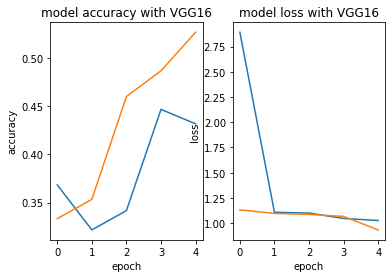

In [135]:
#table to compare the real and expected accuracy and the real and expected loss of the model with VGG16
f, axarr = plt.subplots(nrows=1,ncols=2)
plt.sca(axarr[0]); 
plt.plot(history_VGG16.history['accuracy'],label='training accuracy')
plt.plot(history_VGG16.history['val_accuracy'],label='training validation accurancy')
plt.title('model accuracy with VGG16')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.sca(axarr[1]); 
plt.plot(history_VGG16.history['loss'],label='training loss' )
plt.plot(history_VGG16.history['val_loss'], label='training validation loss')
plt.title('model loss with VGG16')
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.legend()
#plt.figure()
plt.show()

              precision    recall  f1-score   support

           0       0.32      0.22      0.26        50
           1       0.33      0.12      0.18        50
           2       0.33      0.64      0.43        50

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.29       150
weighted avg       0.33      0.33      0.29       150

[[11  6 33]
 [11  6 33]
 [12  6 32]]


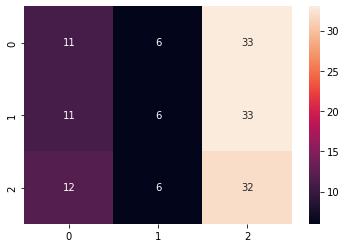

In [136]:
#Confusion matrix for the model with VGG16
CLASS_NAMES = ["COVID-19", "NORMAL", "Viral Pneumonia"]
predictions1 = np.argmax(tfVGG16_model.predict(test_iter), axis = -1)
predictions1
cl_report1=classification_report(test_iter.classes, predictions1)
print(cl_report1)
print(confusion_matrix(test_iter.classes,predictions1))
sns.heatmap(confusion_matrix(test_iter.classes,predictions1), annot = True)

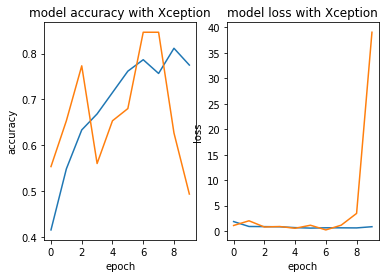

In [137]:
#table to compare the real and expected accuracy and the real and expected loss of the model with Xception
f, axarr = plt.subplots(nrows=1,ncols=2)
plt.sca(axarr[0]); 
plt.plot(history_Xception.history['accuracy'], label='training accuracy')
plt.plot(history_Xception.history['val_accuracy'], label='training validation accuracy')
plt.title('model accuracy with Xception')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.sca(axarr[1]); 
plt.plot(history_Xception.history['loss'], label='training loss')
plt.plot(history_Xception.history['val_loss'], label='training validation loss')
plt.title('model loss with Xception')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

              precision    recall  f1-score   support

           0       0.33      0.64      0.44        50
           1       0.29      0.10      0.15        50
           2       0.22      0.16      0.19        50

    accuracy                           0.30       150
   macro avg       0.28      0.30      0.26       150
weighted avg       0.28      0.30      0.26       150

[[32  6 12]
 [29  5 16]
 [36  6  8]]


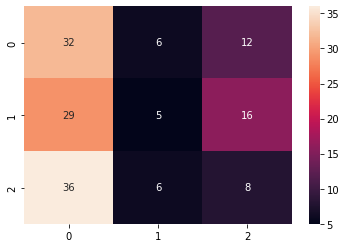

In [138]:
#Confusion matrix for the model with Xception
predictions3 = np.argmax(tfXception_model.predict(test_iter), axis = -1)
predictions3
cl_report3=classification_report(test_iter.classes,predictions3)
print(cl_report3)
print(confusion_matrix(test_iter.classes,predictions3))
sns.heatmap(confusion_matrix(test_iter.classes,predictions3), annot = True)

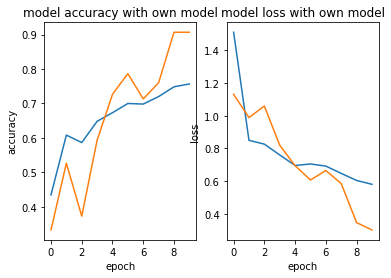

In [151]:
#table to compare the real and expected accuracy and the real and expected loss of the model from scratch
f, axarr = plt.subplots(nrows=1,ncols=2)
plt.sca(axarr[0]); 
plt.plot(history_final.history['accuracy'], label='training accuracy')
plt.plot(history_final.history['val_accuracy'], label='training validation accuracy')
plt.title('model accuracy with own model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.sca(axarr[1]); 
plt.plot(history_final.history['loss'], label='training loss')
plt.plot(history_final.history['val_loss'], label='training validation loss')
plt.title('model loss with own model')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

              precision    recall  f1-score   support

           0       0.39      0.38      0.38        50
           1       0.41      0.36      0.38        50
           2       0.35      0.40      0.37        50

    accuracy                           0.38       150
   macro avg       0.38      0.38      0.38       150
weighted avg       0.38      0.38      0.38       150

[[19 16 15]
 [10 18 22]
 [20 10 20]]


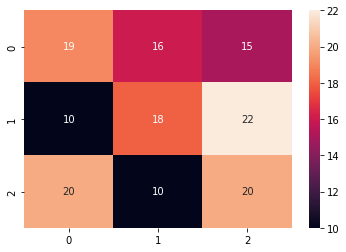

In [152]:
#Confusion matrix for the model created from scratch
predictions4 = np.argmax(final_model.predict(test_iter), axis = -1)
predictions4
cl_report4=classification_report(test_iter.classes,predictions4)
print(cl_report4)
print(confusion_matrix(test_iter.classes,predictions4))
sns.heatmap(confusion_matrix(test_iter.classes,predictions4), annot = True)

X_ray0
	Model prediction: [0.00145321 0.14468962 0.85385716]
	True label: Normal (1)
	Correct: False


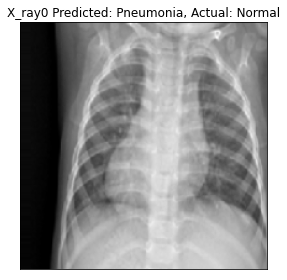

X_ray1
	Model prediction: [0.6218902  0.34512714 0.03298272]
	True label: Covid (0)
	Correct: True


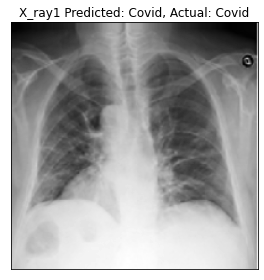

X_ray2
	Model prediction: [0.8708366  0.03847377 0.09068961]
	True label: Covid (0)
	Correct: True


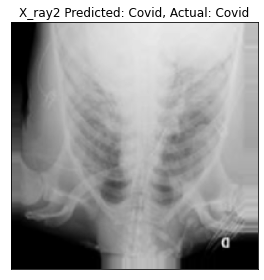

X_ray3
	Model prediction: [0.00125306 0.8279916  0.17075536]
	True label: Normal (1)
	Correct: True


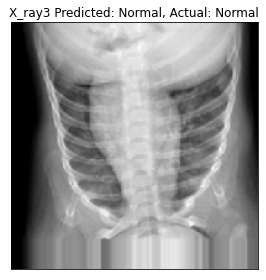

X_ray4
	Model prediction: [0.04223579 0.15915336 0.7986108 ]
	True label: Pneumonia (2)
	Correct: True


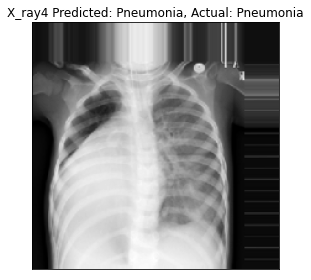

<Figure size 432x288 with 0 Axes>

In [153]:
#Code to visualize the operation of the model
def clean_plot(plot):
    plot.axes.get_xaxis().set_visible(False)
    plot.axes.get_yaxis().set_visible(False)
#First we assign a value to each type of image and define a series of variables
#to test with a set of images, in this case we take only 5
class_names = {
        0: "Covid",
        1: "Normal",
        2: "Pneumonia"
    }
sample_batch_input, sample_labels = test_iter.next()
sample_batch_input = sample_batch_input[:5]
sample_labels = sample_labels[:5]

#predictions of those 5 images and show: the image, the prediction,
#the veracity of the prediction and the real pathology of the lung
sample_predictions = final_model.predict(sample_batch_input)
for i, (image, prediction, label) in enumerate(zip(sample_batch_input, sample_predictions, sample_labels)):
    image_name = "X_ray{}".format(i)
    predicted_class = argmax(prediction).numpy()
    actual_class = argmax(label).numpy()
    print(image_name)
    print("\tModel prediction: {}".format(prediction))
    print("\tTrue label: {} ({})".format(class_names[actual_class], actual_class))
    print("\tCorrect:", predicted_class == actual_class)
    sample_image = image
    clean_plot(plt.imshow(
    sample_image[:, :, 0],
    cmap = "gray"
        ))
    plt.title(image_name + " Predicted: {}, Actual: {}".format(class_names[predicted_class], class_names[actual_class]))
    plt.tight_layout()
    plt.show()
    plt.clf()